## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations
## Due 6 November, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory subset the general subject of differential equations. To get the full story, an absolutely indispensable book is the one by Hirsch and Smale: https://www.amazon.com/Differential-Equations-Dynamical-Systems-Introduction/dp/0123820103
- The material covered here in particular comes from the beginnings of Chapters 1, 2, 3, 3, 6, 12, and 14.

In [1]:
# Imports
import io
import requests
import pandas as pd
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax')
from sympy.utilities.lambdify import lambdify
import scipy
import scipy.ndimage
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Phase Portraits and Linearization

For each of the
following systems, (i) find the equilibria, (ii) linearize the system
around each equilibrium and find the eigenvalues and eigenvectors, (iii)
state whether the system is stable at each equilibrium, (iv) draw a phase
portrait by first drawing the phase portrait near the equilibria and
then interpolating. Compare your drawing to a phase portrait of the entire system generated with Python.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

<hr>

**Def:** An equilibrium point of a set of differential equations $\dot x = f(x)$ is a point $x^*$ such that

$$
f(x^*) = 0 .
$$

<hr>

**Jacobian**

$$
\frac{\partial f}{\partial x} = \left.\left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \dots & \frac{\partial f_1}{\partial x_n} \\
  \vdots &  \; & \vdots \\
  \frac{\partial f_n}{\partial x_1} & \dots & \frac{\partial f_n}{\partial x_n} 
\end{array}
\right ) \right|_{x=x^{*}}
$$

<hr>

Note that once you linearize a system, you end up with $f(x) = Ax$ for some matrix $A \in \mathbb{R}^{n\times n}$. The dynamics of a linear system are thus

$$
\dot x = A x
$$

<hr>

In [2]:
# This is just a convenience function for plotting things.
# Provided by Victor Cannes in office hours
def plot_phase_portrait(matrices,titles):
    """Makes a plot of the phase portraits of the given matrices"""
    fig, ax = plt.subplots(1,len(matrices),figsize=(5*len(matrices),4),squeeze=False)
    
    x1,x2 = np.meshgrid(np.linspace(-1, 1, 9),np.linspace(-1, 1, 9))
    
    for i,[matrix,title] in enumerate(zip(matrices,titles)):
        a = np.array(matrix).astype(np.float64)
        x1dot = a[0,0]*x1 + a[0,1]*x2 # x1'(t) = a11 * x1 + a12 * x2
        x2dot = a[1,0]*x1 + a[1,1]*x2  # x2'(t) = a21 * x1 + a22 * x2
        ax[0,i].quiver(x1, x2, x1dot, x2dot, color='r')
        ax[0,i].set_xlabel('$x_1$')
        ax[0,i].set_ylabel('$x_2$')
        ax[0,i].set_title(title)
        
    plt.subplots_adjust(wspace=0.30)    
    plt.show()
    return None

In [3]:
matrices = []
titles = []

<hr>

The equilibrium of
$\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}$
is 
$\begin{pmatrix}
0 \\
0
\end{pmatrix}$.
<br><br>
$J(x^*) = \frac{\partial f}{\partial x}|_{x=x^{*}} =
\left.\left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} 
\end{array}
\right ) \right|_{x=x^{*}} = 
\left.\left(
\begin{array}{ccc}
  0 & 2x_2 \\
  2x_1 & 0 
\end{array}
\right ) \right|_{x=x^{*}} = 
\begin{pmatrix}
  0 & 0 \\
  0 & 0
\end{pmatrix}
$
<br><br>
Near the equilibrium $
\begin{pmatrix}
0 \\
0
\end{pmatrix}$ the dynamics look like
$$
\dot x = 
\begin{pmatrix}
0 & 0\\
0 & 0
\end{pmatrix}
x.
$$
<br><br>
The eigenvalues are $\lambda_1 = 0$ and $\lambda_2 = 0$. 
<br><br>
The eigenvectors are $v_1 = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$ and $v_2 = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$.
<br><br>
The system is marginally stable at $x^*$ = 
$
\begin{pmatrix}
0 \\
0
\end{pmatrix}
$.

In [40]:
x1,x2 = sp.symbols('x1,x2')
partials = sp.Matrix([x1,x2])
system = sp.Matrix([[x2**2],[x1**2]])
eq = sp.solve(system)
dct = next(iter(eq))
dct

{x₁: 0, x₂: 0}

In [41]:
A = system.jacobian(partials)
A_eq = A.subs(dct)
P,D = A_eq.diagonalize()
matrices.append(A_eq); titles.append('Linear System Part A')
A,A_eq,P,D

⎛⎡ 0    2⋅x₂⎤  ⎡0  0⎤  ⎡1  0⎤  ⎡0  0⎤⎞
⎜⎢          ⎥, ⎢    ⎥, ⎢    ⎥, ⎢    ⎥⎟
⎝⎣2⋅x₁   0  ⎦  ⎣0  0⎦  ⎣0  1⎦  ⎣0  0⎦⎠

/home/kegedy/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/kegedy/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:696: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))
/home/kegedy/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:748: RuntimeWarning: invalid value encountered in less
  short = np.repeat(length < minsh, 8, axis=1)
/home/kegedy/anaconda3/lib/python3.7/site-packages/matplotlib/quiver.py:762: RuntimeWarning: invalid value encountered in less
  tooshort = length < self.minlength


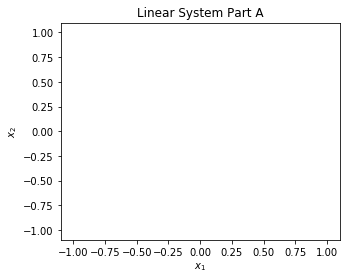

In [6]:
plot_phase_portrait([A_eq],['Linear System Part A']);

<hr>

The equilibrium of
$\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}$
is
$\begin{pmatrix}
0 \\
0
\end{pmatrix}$.
<br><br>
$J(x^*) = \frac{\partial f}{\partial x}|_{x=x^{*}} =
\left.\left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} 
\end{array}
\right ) \right|_{x=x^{*}} = 
\left.\left(
\begin{array}{ccc}
  2x_1 & 2x_2 \\
  0 & 2x_2 
\end{array}
\right ) \right|_{x=x^{*}} = 
\begin{pmatrix}
  0 & 0 \\
  0 & 0
\end{pmatrix}
$
<br><br>
<br><br>
Thus near equilibrium $
\begin{pmatrix}
0 \\
0
\end{pmatrix}$ the dynamics look like
$$
\dot x = 
\begin{pmatrix}
0 & 0\\
0 & 0
\end{pmatrix}
x.
$$
The eigenvalues are $\lambda_1 = 0$ and $\lambda_2 = 0$. 
<br><br>
The eigenvectors are $v_1 = 
\begin{pmatrix}
1 \\
0
\end{pmatrix}
$ and $v_2 = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$.
<br><br>
The system is marginally stable at $x^*$ = 
$
\begin{pmatrix}
0 \\
0
\end{pmatrix}
$.

In [39]:
x1,x2 = sp.symbols('x1,x2')
partials = sp.Matrix([x1,x2])
system = sp.Matrix([[x1**2+x2**2],[x2]])
eq = sp.solve(system)
dct = next(iter(eq))
dct

{x₁: 0, x₂: 0}

In [8]:
A = system.jacobian(partials)
A_eq = A.subs(dct)
P,D = A_eq.diagonalize()
matrices.append(A_eq); titles.append('Linear System Part B')
A,A_eq,P,D

⎛⎡2⋅x₁  2⋅x₂⎤  ⎡0  0⎤  ⎡1  0⎤  ⎡0  0⎤⎞
⎜⎢          ⎥, ⎢    ⎥, ⎢    ⎥, ⎢    ⎥⎟
⎝⎣ 0     1  ⎦  ⎣0  1⎦  ⎣0  1⎦  ⎣0  1⎦⎠

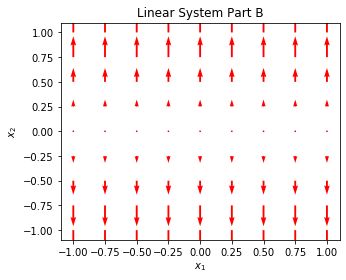

In [9]:
plot_phase_portrait([A_eq],['Linear System Part B']);

<hr>

The equilibrium of
$\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}$
is
$\begin{pmatrix}
0 + \pi n\\
\frac{\pi}{2} + \pi n
\end{pmatrix}$ 
where $n \in \mathbb{Z}$.
<br><br>
$J(x^*) = \frac{\partial f}{\partial x}|_{x=x^{*}} =
\left.\left(
\begin{array}{ccc}
  \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\
  \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} 
\end{array}
\right ) \right|_{x=x^{*}} = 
\left.\left(
\begin{array}{ccc}
  0 & \cos(x_2) \\
  -\sin(x_1) & 0 
\end{array}
\right ) \right|_{x=x^{*}} = 
\begin{pmatrix}
  0 & 1 \\
  -1 & 0
\end{pmatrix}
$
<br><br>
Thus near equilibrium $
\begin{pmatrix}
0 \\
\frac{\pi}{2}
\end{pmatrix}$ the dynamics look like
$$
\dot x = 
\begin{pmatrix}
0 & 1\\
-1 & 0
\end{pmatrix}
x.
$$
<br><br>
The eigenvalues are $\lambda_1 = -i$ and $\lambda_2 = i$. 
<br><br>
The eigenvectors are $v_1 = 
\begin{pmatrix}
i \\
1
\end{pmatrix}
$ and $v_2 = 
\begin{pmatrix}
-i \\
1
\end{pmatrix}
$.
<br><br>
The system is a center node at $x^*$ = 
$
\begin{pmatrix}
0 \\
0
\end{pmatrix}
$.

In [38]:
x1,x2 = sp.symbols('x1,x2')
partials = sp.Matrix([x1,x2])
system = sp.Matrix([[sp.sin(x2)],[sp.cos(x1)]])
eq = sp.solve(system)
dct = next(iter(eq))
dct

⎧    π       ⎫
⎨x₁: ─, x₂: 0⎬
⎩    2       ⎭

In [11]:
A = system.jacobian(partials)
A_eq = A.subs(dct)
P,D = A_eq.diagonalize()
matrices.append(A_eq); titles.append('Linear System Part C')
A,A_eq,P,D

⎛⎡   0      cos(x₂)⎤  ⎡0   1⎤  ⎡ⅈ  -ⅈ⎤  ⎡-ⅈ  0⎤⎞
⎜⎢                 ⎥, ⎢     ⎥, ⎢     ⎥, ⎢     ⎥⎟
⎝⎣-sin(x₁)     0   ⎦  ⎣-1  0⎦  ⎣1  1 ⎦  ⎣0   ⅈ⎦⎠

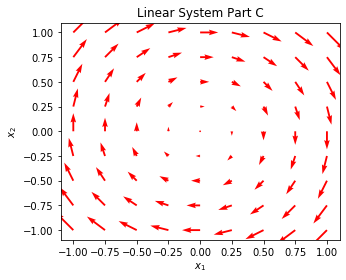

In [12]:
plot_phase_portrait([A_eq],['Linear System Part C']);

<hr>

### 2. Nonlinear Systems

a) Find a single nonlinear systems that has exactly four distinct equilibria, each of which has a different eigenvalue structure (i.e. a different type in the taxonomy). 

b) Find a nonlinear system that has the following phase portrait. Hint: Try polar coordinates. Plot the phase portait in Python.

<img src="https://raw.githubusercontent.com/klavins/ECE447/master/images/limit-cycle.png" width=30%>

**Eigenvalue structures**

- Real, distinct: $
\begin{cases} \lambda_1,\lambda_2>0 \implies \text{Unstable node}\\ \lambda_1,\lambda_2<0 \implies \text{Stable node}\\ \text{one positive, one negative} \implies \text{Saddle point}\end{cases}$
<br><br>
- Real, repeated: $
\begin{cases} \text{two LI eigenvectors} \implies \text{Singular node (could be stable or not)}\\ \text{one LI eigenvector} \implies \text{Degenerate node (could be stable or not)} \end{cases}$
<br><br>
- Real, one zero eigenvalue: marginaally stable
<br><br>
- Complex: $
\begin{cases} Re(\lambda)<0 \implies  \text{Stable focus (i.e. a sprial going toward the center node)} \\ Re(\lambda)>0 \implies  \text{Unstable focus (i.e. a sprial going away the center node)} \\ Re(\lambda)=0  \implies \text{Center node in which the trajectories are circles/ellipses} \end{cases}$

In [13]:
r,o = sp.symbols('r,theta')
partials = sp.Matrix([r,o])
system = sp.Matrix([[(1/2)*(r-r**3)],[1]])
eq = sp.solve(system)
system, eq

⎛⎡       3        ⎤    ⎞
⎜⎢- 0.5⋅r  + 0.5⋅r⎥    ⎟
⎜⎢                ⎥, []⎟
⎝⎣       1        ⎦    ⎠

In [14]:
dct = {r:0,o:0}
A = system.jacobian(partials)
A_eq = A.subs(dct)
P,D = A_eq.diagonalize()
A,A_eq,P,D
matrices.append(A_eq); titles.append('Linear System Part C')

⎛⎡           2   ⎤                                ⎞
⎜⎢0.5 - 1.5⋅r   0⎥  ⎡0.5  0⎤  ⎡ 0   1.0⎤  ⎡0   0 ⎤⎟
⎜⎢               ⎥, ⎢      ⎥, ⎢        ⎥, ⎢      ⎥⎟
⎝⎣     0        0⎦  ⎣ 0   0⎦  ⎣1.0   0 ⎦  ⎣0  0.5⎦⎠

<hr>

$r = \frac{1}{2}(r-r^3)$
<br><br>
$\theta = 1$

In [15]:
def nonlinear_system(init,t):
    r,theta = init
    return [
        (1/2)*(r-r**3),
        1
    ]

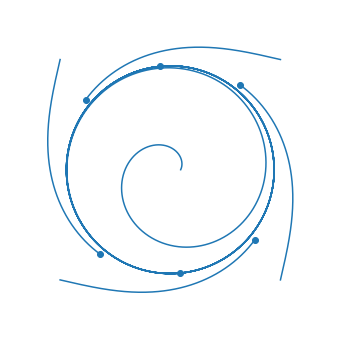

In [16]:
# Define System Inputs
N = 6000
t = np.linspace(0, 40, N)
behavior = nonlinear_system

# Define Initial Conditions
plt.figure(figsize=(6,6))
n = 8
steps = np.linspace(0,2*np.pi,n,endpoint=False)
thetasRgt1 = steps[1::2]
thetasReq1 = steps[0::2] 
inits = [(1.5,theta) for theta in thetasRgt1] + [(1,theta) for theta in thetasReq1]

# Plot Phase with Initial Conditions
for i,init in enumerate(inits):
    X = spi.odeint(behavior,init,t)
    plt.polar(X[0:250,1],X[0:250,0],label=f"R,O = {init[0]:.2f},{init[1]:.2f}rad",color='C0')
    if i not in [5,7]:
        plt.scatter(X[250,1],X[250,0],color='C0')
init = (0.1,2*np.pi)

# Center Point Phase (R close to 0)
X = spi.odeint(behavior,init,t)
plt.polar(X[:,1],X[:,0],label=f"R,O = {init[0]:.2f},{init[1]:.2f}rad",color='C0')
#plt.scatter(X[0,1],X[0,0],color='C0')

# Labels
#plt.legend(loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5));
plt.axis('off')
plt.show();

### 3. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. For what values of $k$ is the system stable? Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

<hr>

**Theorem (Lyapunov):** Now suppose that $x^* = 0$ is an equilibrium point of $\dot x = f(x)$. Then locally, $\dot x = Ax$. If this linear system defined by $A$ is stable, then $0$ is locally stable for the system defined by $f$. Furthermore, for $A$ to be stable, we require that

$$
\mathrm{re}(\lambda) < 0
$$

for all eigenvalues $\lambda$ of $A$. 

<hr>

In [17]:
# Define A
k = sp.symbols('k')
A = sp.Matrix([[k,-k],[1,k-1]])

# Find Eigenvalues
l = list(A.eigenvals().keys())
l
eig0 = lambdify(k, l[0])
eig1 = lambdify(k, l[1])

⎡      _________            _________    ⎤
⎢    ╲╱ 1 - 4⋅k    1      ╲╱ 1 - 4⋅k    1⎥
⎢k - ─────────── - ─, k + ─────────── - ─⎥
⎣         2        2           2        2⎦

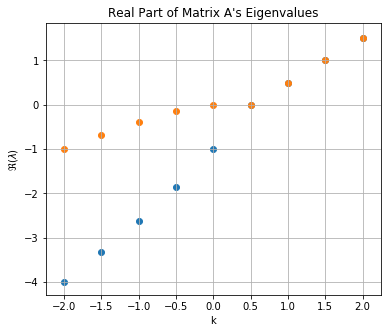

In [18]:
# Plot
K = np.linspace(-2,2,9)    
fig, ax = plt.subplots(figsize=(6,5))
ax.scatter(K,np.real(eig0(K)))
ax.scatter(K,np.real(eig1(K)))

# Labels
plt.grid(True)
ax.set_xlabel('k')
ax.set_ylabel('$\Re(\lambda)$')
ax.set_title("Real Part of Matrix A's Eigenvalues");

The system is stable from $k = [-\infty,0.5].$

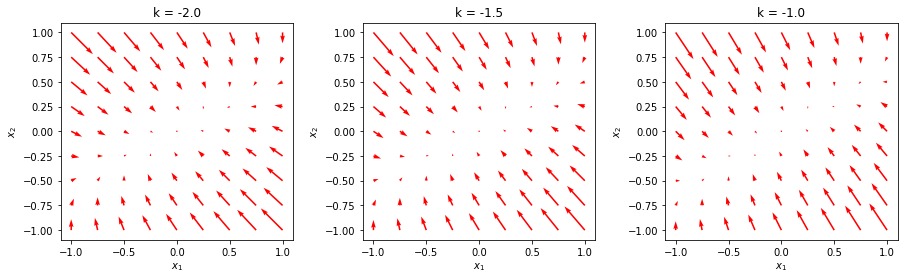

In [19]:
# Phase Plots for k in stable range
matrices = []
titles = []
K = np.linspace(-2,-1,3)
for elem in K:
    matrices.append(A.subs({k:elem}))
    titles.append(f'k = {elem}')
plot_phase_portrait(matrices,titles)

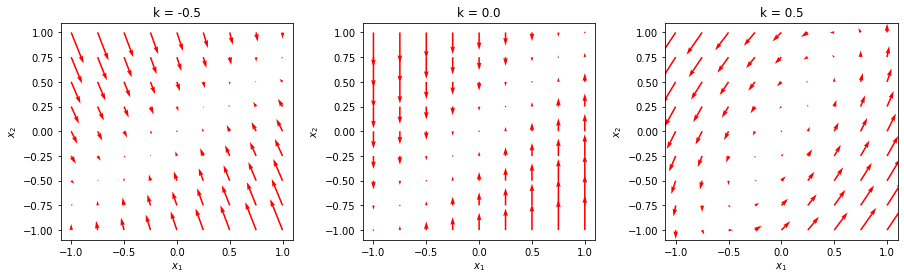

In [20]:
matrices = []
titles = []
K = np.linspace(-0.5,0.5,3)
for elem in K:
    matrices.append(A.subs({k:elem}))
    titles.append(f'k = {elem}')
plot_phase_portrait(matrices,titles)

### 4. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that $e^{At}$ is an **orthonormal** matrix. (Recall that $Q$ is orthonormal if $Q^TQ = QQ^T = I$. Use the definition of the matrix exponential as a series. 

c) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points. 

d) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

In [21]:
w1,w2,w3 = sp.symbols('w1,w2,w3')
A = sp.Matrix([[0,-w3,w2],[w3,0,-w1],[-w2,w1,0]])
assert A.T == -A, "A,T !- -A"

Observe $(e^{At})^T = e^{A^{T}t}$
<br><br>
$ \begin{eqnarray}
(e^At)^T & = &  {(I + At + \frac{(At)^2}{2!} + \frac{(At)^3}{3!} + \cdots)}^T \\
    & = &  (\sum_{n=0}^\infty \frac{1}{n!}(At)^n)^T \\
    & = & \sum_{n=0}^\infty (\frac{1}{n!}(At)^n)^T \\ 
    & = & \sum_{n=0}^\infty \frac{1}{n!}((At)^n)^T \\ 
    & = & \sum_{n=0}^\infty \frac{1}{n!}{((At)^T)}^n \\ 
    & = & \sum_{n=0}^\infty \frac{1}{n!}(A^T)^{n}(t)^n \\ 
    & = & e^{A^{T}t}
\end{eqnarray}$
<br><br>
Observe $ e^{A^{T}t} = e^{tA^{T}}$
<br><br>
$ \begin{eqnarray}
\sum_{n=0}^\infty \frac{1}{n!}(A^T)^{n}(t)^n & = & \sum_{n=0}^\infty \frac{1}{n!}(t)^n(A^T)^{n}
\end{eqnarray}$
<br><br>
Using these observations, then
<br><br>
$ \begin{eqnarray}
(e^{At})^T \cdot (e^{At}) & = & e^{(At)^T \cdot At} \\
    & = & e^{(A^{T} + A)t} \\
    & = & e^{(-A + A)t} \\
    & = & e^{(0)t} \\
    & = & e^0 \\
    & = & I
\end{eqnarray}$
<br><br>
Thus $(e^{At})^T$ is orthornormal since $Q^TQ = QQ^T = I$.

In [32]:
a,w1,w2,w3 = sp.symbols('a,w1,w2,w3')
A = sp.Matrix([[0,-w3,w2],[w3,0,-w1],[-w2,w1,0]])
x = a * sp.Matrix([[w1],[w2],[w3]])
system = A*x
eq = sp.solve(system)
A,x,system,eq

⎛⎡ 0   -w₃  w₂ ⎤  ⎡a⋅w₁⎤  ⎡0⎤    ⎞
⎜⎢             ⎥  ⎢    ⎥  ⎢ ⎥    ⎟
⎜⎢w₃    0   -w₁⎥, ⎢a⋅w₂⎥, ⎢0⎥, []⎟
⎜⎢             ⎥  ⎢    ⎥  ⎢ ⎥    ⎟
⎝⎣-w₂  w₁    0 ⎦  ⎣a⋅w₃⎦  ⎣0⎦    ⎠

### 5. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$ there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. Also show that there number $q$ such that $u=v=q$ is an unstable equilibrium. **Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

In [45]:
u,v,a1,a2 = sp.symbols('u,v,alpha1,alpha2')
partials = sp.Matrix([u,v])
system = sp.Matrix([[a1/(1+v**2)-u],[a2/(1+u**2)-v]])
system = system.subs({a1:sp.Rational(17,4), a2:sp.Rational(17,4)})
eq = sp.solve(system)
dct = next(iter(eq))
dct

{u: 1/4, v: 4}

In [46]:
A = system.jacobian(partials)
A_eq = A.subs(dct)
P,D = A_eq.diagonalize()
A,A_eq,P,D

⎛⎡                -17⋅v   ⎤                                       ⎞
⎜⎢    -1       ───────────⎥                                       ⎟
⎜⎢                       2⎥                                       ⎟
⎜⎢               ⎛ 2    ⎞ ⎥  ⎡ -1   -2/17⎤           ⎡-25        ⎤⎟
⎜⎢             2⋅⎝v  + 1⎠ ⎥  ⎢           ⎥  ⎡1  -1⎤  ⎢────    0  ⎥⎟
⎜⎢                        ⎥, ⎢-32        ⎥, ⎢     ⎥, ⎢ 17        ⎥⎟
⎜⎢   -17⋅u                ⎥  ⎢────   -1  ⎥  ⎣4  4 ⎦  ⎢           ⎥⎟
⎜⎢───────────      -1     ⎥  ⎣ 17        ⎦           ⎣ 0    -9/17⎦⎟
⎜⎢          2             ⎥                                       ⎟
⎜⎢  ⎛ 2    ⎞              ⎥                                       ⎟
⎝⎣2⋅⎝u  + 1⎠              ⎦                                       ⎠

<hr>

Find alpha1, alpha2 such that [udot,vdot] = [0,0]

In [66]:
u,v,a1,a2 = sp.symbols('u,v,alpha1,alpha2')
partials = sp.Matrix([a1,a2])
system = sp.Matrix([[a1/(1+v**2)-u],[a2/(1+u**2)-v]])
eq = sp.solve(system)
dct = next(iter(eq))
dct

⎧      ⎛ 2    ⎞        ⎛ 2    ⎞⎫
⎨α₁: u⋅⎝v  + 1⎠, α₂: v⋅⎝u  + 1⎠⎬
⎩                              ⎭

In [67]:
system
system = system.subs({u:3,v:3})
eq = sp.solve(system)
dct = next(iter(eq))
system, eq

⎡  α₁      ⎤
⎢────── - u⎥
⎢ 2        ⎥
⎢v  + 1    ⎥
⎢          ⎥
⎢  α₂      ⎥
⎢────── - v⎥
⎢ 2        ⎥
⎣u  + 1    ⎦

⎛⎡α₁    ⎤                  ⎞
⎜⎢── - 3⎥                  ⎟
⎜⎢10    ⎥                  ⎟
⎜⎢      ⎥, {α₁: 30, α₂: 30}⎟
⎜⎢α₂    ⎥                  ⎟
⎜⎢── - 3⎥                  ⎟
⎝⎣10    ⎦                  ⎠

### 6. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 

In [27]:
def system_behavior(init,t):
    x,y,z = init
    a,b,c = 0.2, 0.2, 5.7
    return [
        -y - z,
        x + a*y,
        b + z*(x-c)
    ]

def system_plot(behavior, init, t):
    
    x,y,z = init
    
    # ?
    X = spi.odeint(behavior,init,t);

    # Plot
    fig, axs = plt.subplots(1,3,figsize=(15,5))

    # XZ
    axs[0].plot(X[:,0],X[:,2],label="X-Z");
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("z");
    axs[0].set_title("X-Z Plane")

    # XY
    axs[1].plot(X[:,0],X[:,1],label="X-Y");
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("y");
    axs[1].set_title("X-Y plane")

    # YZ
    axs[2].plot(X[:,1],X[:,2],label="Y-Z");
    axs[2].set_xlabel("y")
    axs[2].set_ylabel("z");
    axs[2].set_title("Y-Z plane")

    # Labels
    plt.subplots_adjust(wspace=0.30)
    fig.suptitle(f'System Behavior with Initial Conditions x,y,z = {x},{y},{z}')
    plt.show();
    
    return None

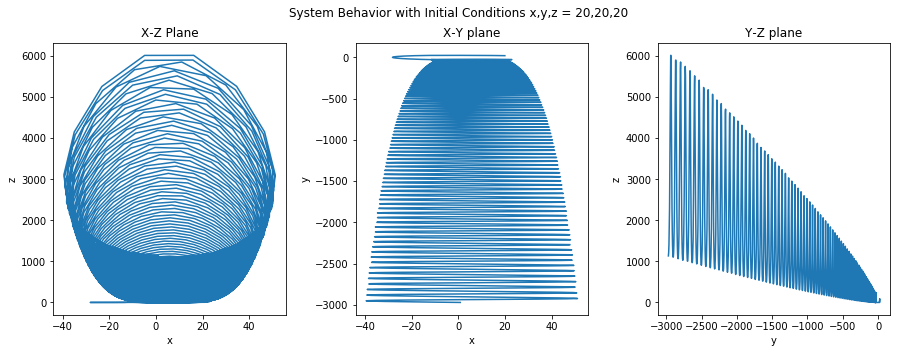

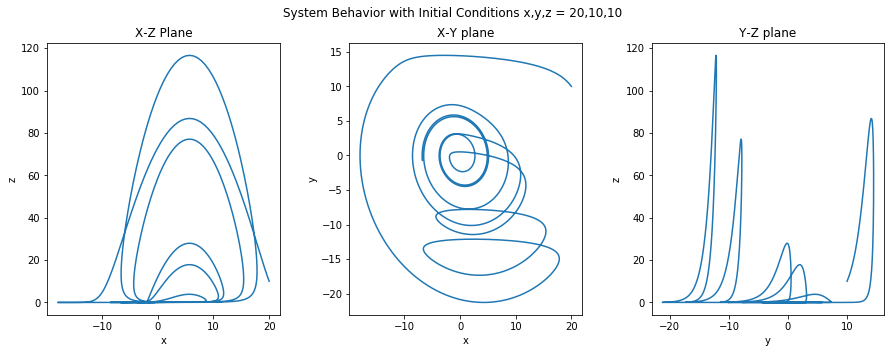

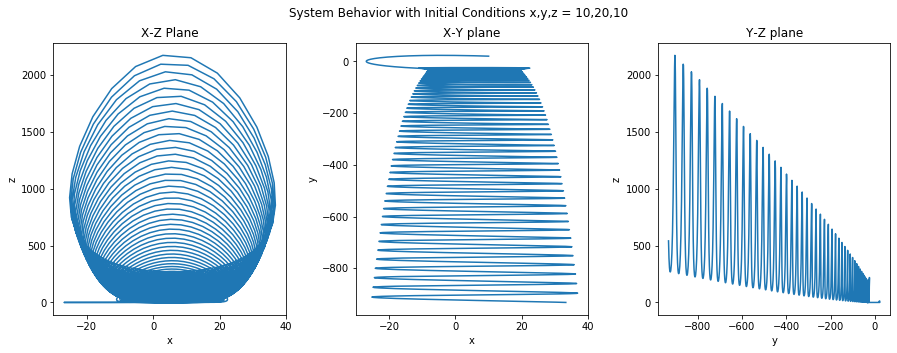

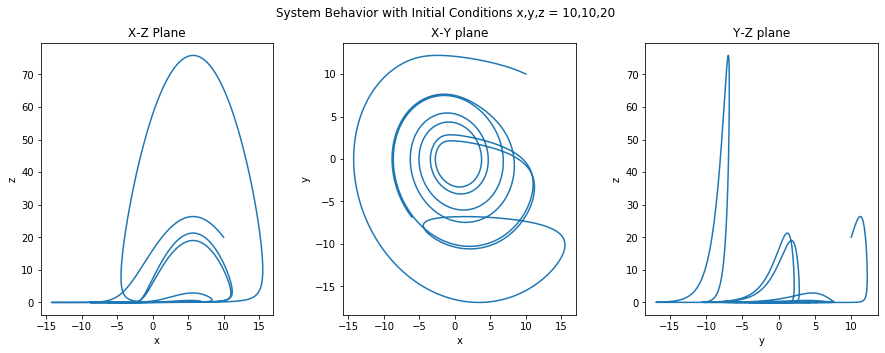

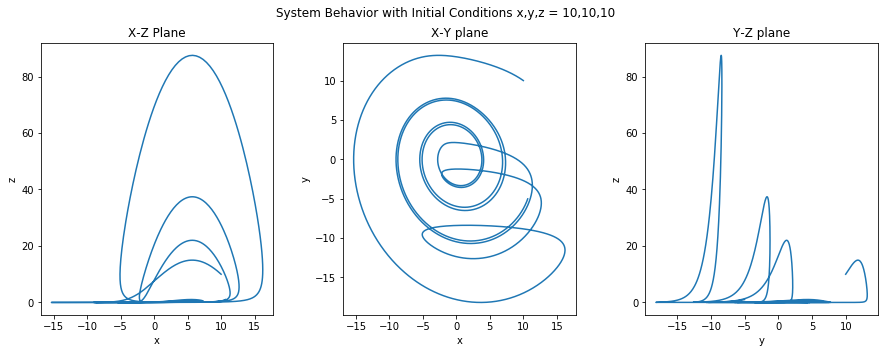

In [28]:
# Define inputs
t = np.linspace(0, 40, 6000)
behavior = system_behavior

init = (20,20,20)
system_plot(behavior, init, t)

init = (20,10,10)
system_plot(behavior, init, t)

init = (10,20,10)
system_plot(behavior, init, t)

init = (10,10,20)
system_plot(behavior, init, t)

init = (10,10,10)
system_plot(behavior, init, t)